# Linear Regression From Scratch

# content

1. Linear Regression Model.
2. Linear Regression Loss Function.
3. From Where This Loss Function Come From.
4. Gradient Descent Algorithm.
5. Optimization Of Loss Function.
6. Overfitting and Underfitting.
7. Regularization.

    7.a Lasso L1 regularization.
    7.b Ridge L2 regularization.

# 1. Linear Regression Model

\begin{equation}
y={\beta}_0 + {\beta}_1x_1
\end{equation}

where as x1 is independent variable and y is dependent or response variable and ${\beta}_0$ and ${\beta}_1$ is intercept and slop.

we can also be written the linear model.

\begin{equation}
y={\beta}_0 + {\beta}^{T}X
\end{equation}

where ${\beta}^{T}$ is the matrics of the parameter of size ${[}{\beta}_1{....}{\beta}_N{]}$ and ${X}$ is your features vectors ${[}{x1}{......}{x}_N{]}$

let's some pratical visualization of how our linear model look's like.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x1 = np.random.uniform(low=0,high=4,size=100)

beta_0 = 2

beta_1 = 5

In [32]:
y= beta_0 + beta_1*x1

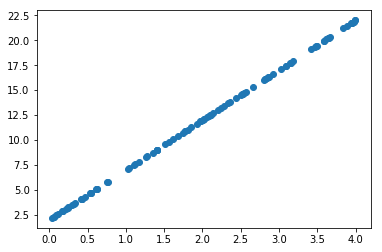

In [33]:
plt.scatter(x1,y)

Above visualization in not present in our real-life problems. in our real-life problems having some noise.

And due to presence of noise we cannot find out the true relationship between independent variable ${x}_1$ and response variable ${y}$

let's see the practical intuition behind the noise.

In [43]:
x1 = np.random.uniform(low=0,high=5,size=100)

beta_0 = 2

beta_1 = 5

epsilon = np.random.normal(loc=0.0,scale=7,size=100)

In [44]:
y = beta_0 + beta_1 * x1 + epsilon

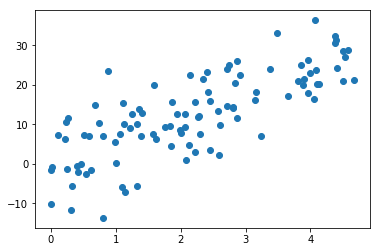

In [45]:
plt.scatter(x1,y)
plt.show()

you can see Above graph after adding the noise there is problem to identify that what is our true function.$y$ = ${\beta}_0$ $+$ ${\beta}_1x_1$

What we are doing here we are Approximate the independent variable ${x}_1$ and response variable ${y}$ by using the function. ${y}$ = $\hat{f}{(\beta)}$ + ${\epsilon}$

Now our Approximate function $\hat{f}{(\beta)}$ is.

\begin{equation}
\hat{f}{(\beta)} = \hat{\beta}_0 + \hat{\beta}_1x_1
\end{equation}

# 2. Linear Regression Loss Function

Our loss function in linearn regression is look like.

\begin{equation}
L{(\beta)} = \frac{1}{2}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

# 3. From Where This Loss Function Come From.

In this this section we will give a set of probabilistic assumption,under which least-squares regression is derived as a very natural algorithm.

let's us assume that the response variables and the inputs are related via the equation. 

we are considering the whole training data $N$.

\begin{equation}
{y}_i=\hat{f}{(\beta)} + {\epsilon}_i
\end{equation}

where ${\epsilon}_i$ is random noise

let's further assume that the ${\epsilon}_i$ are distributed IID(Independently and Identically distributed),according to a Gaussian distribution(also called the Normal distribution) with zero mean and some variance ${\sigma}^2$.

We can write the assumption as ${\epsilon}_i$$\sim$$\mathcal{N}(0,{\sigma}^2)$

so we can write the probability density function of that noise term.${\epsilon}$

\begin{equation}
{p}{(\epsilon_i)} = \frac{1}{\sqrt{2}{\pi}{\sigma}}e^{(-{\frac{(\epsilon_i)^2}{2\sigma})}}
\end{equation}

this implies that.

\begin{equation}
{p}{(y_i|x_i;{\beta})} = \frac{1}{\sqrt{2}{\pi}{\sigma}}e^{(-\frac{({y}_i-\hat{f}{(\beta})^2}{2\sigma^2})}
\end{equation}

this notaion $"$$p{({y}_i|{x}_i;{\beta})}$$"$ indicates that this is the distribution of ${y}_i$ given ${x}_i$ and
and parameterized by ${\beta}$. Note that we should not condition on ${\beta}$  $(p{({y}_i|{x}_i;{\beta})})$, since ${\beta}$ is not a random variable. we can also write the distribution of ${y}_i$ as ${y}_i|{x}_i$; ${\beta}$$\sim$$\mathcal{N}({\beta}^T{x}_i,{\sigma})$.

Given $X$ (the design matrix which conatins all the ${x}_i$'s) and ${\beta}$ what is the distribution of the ${y}_i$'s ?. The probability of the data is given by $p{(y|X;{\beta})}$.

now we are going to construct the likelihood function of above distribution.

\begin{equation}
L{(\beta)} = L{(\beta;X,y)} = p{(y|X;{\beta})}
\end{equation}

Note that by the independence assumption on the ${\epsilon}_i$'s and hence also the ${y}_i$ given the ${x}_i$.

so our likelihood probability is look's like.

\begin{equation}
L({\beta}) = p({y}_1|{x}_1)p({y}_2|{x}_2)p({y}_3)|{x}_3).....................p({y}_N|{x}_N)
\end{equation}

so we can also write as

\begin{equation}
L(\beta) = \prod_{i=1}^Np({y}_i|{x}_i;{\beta})
\end{equation}

\begin{equation}
L{(\beta)}=\frac{1}{\sqrt{2}{\pi}{\sigma}}e^{(-\frac{({y}_i - \hat{f}{(\beta)})^2}{2\sigma^2})}
\end{equation}

Now given this probabilistic model relating the ${y}_i$'s and the ${x}_i$'s, what is a reasonable way of choosing our best guess of the parameters ${\beta}$ ?

The principal of "Maximum likelihood" says that we should choose ${\beta}$ so as to make the data as high probability as possible. we should choose ${\beta}$ to maximize $L{(\beta)}$

Instead of maximizing $L{(\beta)}$ we can also maximize any strictly increasing function of $L{(\beta)}$. In particular, the derivation will be a bit simple if we instead maximize the log likelihood $l{(\beta)}$

we represent log likelihood function to $l{(\beta)}$

\begin{equation}
{l}{(\beta)} = \log{L{(\beta)}}
\end{equation}

\begin{equation}
{l}{(\beta)} = \log\prod_{i=1}^N\frac{1}{\sqrt{2}{\pi}{\sigma}}e^{(-\frac{({y}_i - \hat{f}{(\beta)})^2}{2\sigma^2})}
\end{equation}

\begin{equation}
{l}{(\beta)} = \sum_{i=1}^N\log\frac{1}{\sqrt{2}{\pi}{\sigma}}e^{(-\frac{({y}_i - \hat{f}{(\beta)})^2}{2\sigma^2})}
\end{equation}

\begin{equation}
{l}{(\beta)} = N\log\frac{1}{\sqrt{2}{\pi}{\sigma}} - \frac{1}{\sigma^2}{.}\frac{1}{2}\sum_{i=1}^N({y}_i-\hat{f}{(\beta)})^2
\end{equation}

now taking negative of log likelihood function ${l}{(\beta)}$

\begin{equation}
{l}{(\beta)} = -\log{L}{(\beta)}
\end{equation}

\begin{equation}
 {l}{(\beta)} =  - N\log\frac{1}{\sqrt{2}{\pi}{\sigma}}  + \frac{1}{\sigma^2}{.}\frac{1}{2}\sum_{i=1}^N({y}_i-\hat{f}{(\beta)})^2
\end{equation}

hence, instead of maximizing log likelihood function ${l}{(\beta)}$ we minimizing the result of neg log likelihood function which are look's like.

\begin{equation}
\frac{1}{2}\sum_{i=1}^N({y}_i - \hat{f}{(\beta)})^2
\end{equation}

which we recognize to be $L{(\beta)}$ ,our original least-squares loss function.

Note also that, in our previous discussion , our final choice of ${\beta}$ did not depend on what was ${\sigma^2}$

# 5. Gradient Descent Algorithm.

We want to choose ${\beta}$ so as minimize our loss function $L{(\beta)}$. to do so,let's use a search algorithm that starts with some initial gusess for ${\beta}$ ,and that repeatedly changes ${\beta}$ to make $L{(\beta)}$ smaller. until hopefully we converge to a value of ${\beta}$ that minimizes $L{(\beta)}$. Specifically ,let's consider the "Gradient Descent Algorithm", which starts with some initial ${\beta}$, and repeatedly performs the update.

Gradient Descent Algorithm look like.

\begin{equation}
{\beta}_0 = {\beta}_0 - {\alpha}\frac{\partial}{\partial {\beta}_0}{L}{(\beta)}
\end{equation}

\begin{equation}
{\beta}_i = {\beta}_i - {\alpha}\frac{\partial}{\partial {\beta}_i}{L}{(\beta)}
\end{equation}

# 5. Optimization Of Loss Function.

In order to implement this gradient descent algorithm , we have to work out what is the partial derivative term on right hand side. Let's first work it out for the case of if we have only on tarining example (x,y) so that we can neglect the sum in the definiation of ${L}{(\beta)}$. We have

let's find out the ${L}{(\beta)}$ w.r.t    ${\beta}_0$   and also   ${L}{(\beta)}$   w.r.t    ${\beta}_i$

first we calculate $L{(\beta)}$ w.r.t ${\beta}_0$

\begin{equation}
\frac{\partial}{\partial {\beta}_0}{L}{(\beta)} = \frac{\partial}{\partial {\beta}_0}\frac{1}{2}({y} - ({\hat{\beta}_0 + \hat{\beta}_i}{x}_i))^2
\end{equation}

\begin{equation}
\frac{\partial}{\partial{\beta}_0}{L}{(\beta)}=\frac{2}{2}(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i)){.}\frac{\partial}{\partial {\beta}_0}(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i )
\end{equation}

\begin{equation}
\frac{\partial}{\partial{\beta}_0}{L}{(\beta)}=(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i))(-\hat{\beta}_0)
\end{equation}

same for we calculate $L{(\beta)}$ w.r.t ${\beta}_i$

\begin{equation}
\frac{\partial}{\partial {\beta}_i}{L}{(\beta)} = \frac{\partial}{\partial {\beta}_i}\frac{1}{2}(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i))^2
\end{equation}

\begin{equation}
\frac{\partial}{\partial {\beta}_i}{L}{(\beta)} = \frac{2}{2}(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i))\frac{\partial}{\partial {\beta}_i}(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i))
\end{equation}

\begin{equation}
\frac{\partial}{\partial {\beta}_i}{L}{(\beta)} = (y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i))(-{x}_i)
\end{equation}

here , ${\alpha}$ is called the learning rate. this is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of loss function ${L}{(\beta)}$

For a single training example, this gives the update rule:

\begin{equation}
{\beta}_0 = {\beta}_0  + {\alpha}(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i))(\hat{\beta}_0)
\end{equation}

\begin{equation}
{\beta}_i  = {\beta}_i + {\alpha}(y - (\hat{\beta}_0 + \hat{\beta}_i{x}_i))({x}_i)
\end{equation}

The rule is called the LMS update rule(LMS stands for "least mean squares"). This rule has several properties that seem natual and intuitive. For instance the magnitude of the update is proportional to error term (${y}_i$ - $\hat{f}{(\beta})$); thus for instance if we are encountering a training example on which our prediction nearly matches the actual values of ${y}_i$, then we find that there is little need to change the parameters in contrast ,a large change to the parameters will be made if our prediction $\hat{f}{(\beta)}$ has large error (i.e. ,if it very far from ${y}_i$).

# 6. Overfitting and Underfitting.

Assume you are given a well fitted machine learning model $\hat{f}$ that you want to apply on some test dataset. For instances, the model could be a linear regression whose parameters were computed using some training set different from your test set. For each point x in your test set you want to predict the associated target ${y}$  and compute the mean squared error.

You now realize that this MSE is too high and try to find an explanation to this result.

 -> Overfitting:

The model is too closely related to the example in the training set and doesn't generalize well to other example.
that means our model performance on training set is $100$% but when we goes for testing set then that performance is not good.

-> Underfitting: 

The model didn't gather enough information from the training set and doesn't capture the link between the features ${x}$ and target ${y}$.

that means the MSE on training set is high and MSE on testing set is also high.

# let's talk about the detail math's behind this overfitting and underfitting.

we are taking the small example of which is marks of students which is $X$ = $[x1,x2.........xN]$ features vector and corresponding salary of students which is Y = $[y1,y2...........yN]$ target vectors. where $N$ is your examples

let's suppose that N = 10000 example and we divided into two part 8000 training set and 2000 test set.

now what we are doing we assume that 8000 training examples is a population kinds of data.

And we are performing Bootstrap sampling over 8000 training examples.

Bootstrap sampling is technique in which we are taking sample with replacement.

and our sample size is all training examples that is 8000.

now we are taking 100 bootstrap sample from our tarining examples , that is $[s1,s2.............s100]$

let's an example from testing set and through this single example we are finding predicted answer which is $[\hat{y}_1,\hat{y}_2...............\hat{y}_{100}]$ which can represent $\hat{y}$. and this is your random variables of predicted salary.

Now let's calculate the MSE of testing data on a single example.

\begin{equation}
{MSE}_{test} = E[(y - \hat{y})^2]
\end{equation}

we know that
\begin{equation}
y = f{(\beta)} + {\epsilon}
\end{equation}

\begin{equation}
=   E[({f}{(\beta)} + {\epsilon} -  \hat{y})^2 ]
\end{equation}

\begin{equation}
=  E[({(\epsilon)} + ({f{(\beta)} - \hat{y}))^2}]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2} + (f{(\beta)}- \hat{y})^2  + 2{(\epsilon)}(f{(\beta)} - \hat{y})]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)} - \hat{y})^2] + E[2{(\epsilon)(f{(\beta)} - \hat{y})}]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)} - \hat{y})^2] + 2E[{(\epsilon)}]E[(f{(\beta)} - \hat{y})]
\end{equation}

so now above expression ${(\epsilon)}$ and sample through which we find $\hat{y}$ which is random variables of $[\hat{y}_1,\hat{y}_2...............\hat{y}_{100}]$

we can say $E[{(\epsilon)}]$ = $0$ so this whole quantity $2$$E[{(\epsilon)}]E[(f{(\beta)} - \hat{y})]$ become equal to $0$

let's further proceed.

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)} - \hat{y})^2]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)} - E[\hat{y}] + E[\hat{y}] - \hat{y})^2]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)} - E[\hat{y}])^2+E[(E[\hat{y}]-\hat{y})^2]+2E[(f{(\beta)}- E[\hat{y}])(E[\hat{y}] - \hat{y})]]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)}- E[\hat{y}])^2] + E[(E[\hat{y}] - \hat{y})^2] + 2E[f{(\beta)}E[\hat{y}] - f{(\beta)}\hat{y} - E[\hat{y}]E[\hat{y}] +\hat{y}E[\hat{y}]]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)}- E[\hat{y}])^2] + E[(E[\hat{y}] - \hat{y})^2] + 2[f{(\beta)}E[\hat{y}] - f{(\beta)}E[\hat{y}] - E[\hat{y}]E[\hat{y}] +E[\hat{y}]E[\hat{y}]]
\end{equation}

\begin{equation}
= E[{(\epsilon)^2}] + E[(f{(\beta)}- E[\hat{y}])^2] + E[(E[\hat{y}] - \hat{y})^2] + 2[f{(\beta)}E[\hat{y}] - f{(\beta)}E[\hat{y}] - (E[\hat{y}])^2 + (E[\hat{y}])^2]
\end{equation}

due to some statistics assumption that term become equal to zero. 
\begin{equation}
2[f{(\beta)}E[\hat{y}] - f{(\beta)}E[\hat{y}] - E[\hat{y}]E[\hat{y}] +E[\hat{y}]E[\hat{y}]] = 0
\end{equation}

so now

\begin{equation}
{MSE}_{test}= E[{(\epsilon)^2}] + E[(f{(\beta)}- E[\hat{y}])^2] + E[(E[\hat{y}] - \hat{y})^2]
\end{equation}

let's solve this three terms.

we are going to explain this term
\begin{equation}
E[(f{(\beta)}- E[\hat{y}])^2]
\end{equation}

first we explain this term $E[\hat{y}]$ what is this.

we know that $\hat{y}$ is your random variables of $100$ sample of predicted answer, and we taking the average of this $100$ sample of predicted answer which is represented as $E[\hat{y}]$.

we can also write as.

\begin{equation}
E[\hat{y}] = \frac{\hat{f}_1{(\beta)} + \hat{f}_2{(\beta)} + \hat{f}_3{(\beta)}+ ..................+ \hat{f}_{100}{(\beta)}}{100}
\end{equation}

\begin{equation}
E[\hat{y}] = \frac{(\hat{\beta}_0^1 +\hat{\beta}_1^1{x}) + (\hat{\beta}_0^2 + \hat{\beta}_1^2{x}) + (\hat{\beta}_0^2 + \hat{\beta}_1^3{x}) .....................+(\hat{\beta}_0^{100} + \hat{\beta}_1^{100}{x})}{100}
\end{equation}

\begin{equation}
E[\hat{y}] = \frac{(\hat{\beta}_0^1 + \hat{\beta}_0^2 + \hat{\beta}_0^3 + ..................+ \hat{\beta}_0^{100})}{100} + \frac{(\hat{\beta}_1^1 + \hat{\beta}_1^2 + \hat{\beta}_1^3 + ................+ \hat{\beta}_1^{100}){x}}{100}
\end{equation}

so above expression after solve this we get $E[\hat{\beta}_0]$ and $E[\hat{\beta}_1]$ is the best estimates, because we know the given samples. if plot this we get some guassian distribution over this samples.  and mean of this gaussian distribution is the MVUE(minimum variance and unbias estimates).

so our final expression of above equation is.
\begin{equation}
E[\hat{y}] = E[\hat{\beta}_0] + E[\hat{\beta}_1]{x}
\end{equation}

so in this term $E[(f{(\beta)}-E[\hat{y}])]$, $E[\hat{y}]$ is our predicted answer and $f{(\beta)}$ is the our true answer and there difference is represent the MVUE(minimum variance and unbias estimates) and this term we called (Bias). 

so now our equation look's like
\begin{equation}
{MSE}_{test} = E[(\epsilon)^2] + E[(bias)^2] + E[(E[\hat{y}] - \hat{y})^2]
\end{equation}

now we are going to explain this term.
\begin{equation}
E[(E[\hat{y}] - \hat{y})^2]
\end{equation}

we know that the $\hat{y}$ is random variables of the predicted answer of 100 sample from our tarining set which is $[\hat{y}_1,\hat{y}_2,\hat{y}_3....................\hat{y}_{100}]$

and we also know $E[\hat{y}]$ is the mean of the whole predicted answer.

so we can also write as.
\begin{equation}
E[(E[\hat{y}] - \hat{y})^2] = \frac{(E[\hat{y}] - \hat{y}_1)^2 + (E[\hat{y}] - \hat{y}_2)^2 + ..............+ (E[\hat{y}] - \hat{y})^2}{100} = variances
\end{equation}

now our final result.
\begin{equation}
{MSE}_{test} = E[(\epsilon)^2] + E[(bias)^2]  + variances
\end{equation}

we can also write.
\begin{equation}
{MSE}_{test} = (\epsilon)^2  + (bias)^2 + variances
\end{equation}

# 7. Regularization.

Regularization is a way to prevent overfitting.

this things happen when you used high oder polynomial degree function, that means your data is good prediction on two degree polynomial but fitted more than three degree polynomial function.

In this regularization we talk two techniques which is given below.

-> ${L}_1$-regularization $=>$ LASSO regression


-> ${L}_2$-regularization $=>$ Ridge regression

let's first talk about.

# L2-regularization. 

Ridge regression shrinks the regression coffcients by imposing a penalty on their size.

we konw that our loss function in linear regression is.

\begin{equation}
L{(\beta)} = \frac{\sum_{i=1}^N({y}_i- (\hat{\beta}_0  + \hat{\beta}_1{x}_i)^2)}{N}
\end{equation}

and when you add ${L}_2$ regularization term into loss function of linear regression the our loss function is look's like.

\begin{equation}
L{(\beta)} = \frac{\sum_{i=1}^N({y}_i - (\hat{\beta}_0 + \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i))^2}{N} + \sum_{j=1}^2\frac{\lambda}{2}||\hat{\beta}||_{2}^2
\end{equation}

${\lambda}$  is regularization parameter.

now what we are doing, we try to minimize the ridge coefficients such that we minimize our above loss function.

where ridge parameters $\hat{\beta}$ = $[\hat{\beta}_{1}^2 + \hat{\beta}_{2}^2]$

here ${\lambda}$ $\geq$ $0$ is complexity parameters that controls the amount of shrinkage. the larger the value of ${\lambda}$ , the greater the amount of shrinkage. the coeffcients are shrunk toward the zero.  the idea of penalizing by the sum-of-squares of the parameters is also used in neural networks where it is know as (weight decay).

let's start....

for finding the ridge coefficient we simply take derivative and make the equal to zeros. 

\begin{equation}
\frac{\partial {L}{(\beta)}}{\partial {\beta}_1} = 0
\end{equation}

\begin{equation}
\frac{\partial {L}{(\beta)}}{\partial {\beta}_2} = 0 
\end{equation}

\begin{equation}
\frac{-2}{N}\sum_{i=1}^N({y}_i - (\hat{\beta}_0 + \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i)){x}_i + \frac{2\lambda}{2}||\hat{\beta}_1||   = 0
\end{equation}

\begin{equation}
\frac{-2}{N}\sum_{i=1}^N({y}_i - (\hat{\beta}_0 + \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i)){z}_i + \frac{2\lambda}{2}||\hat{\beta}_2||    = 0
\end{equation}

let's how to write this term in form of matrix.
\begin{equation}
-\sum_{i=1}^N({y}_i - (\hat{\beta}_0 + \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i))
\end{equation}

\begin{equation}
-\sum_{i=1}^N{y}_i
\end{equation}
is equal to...

\begin{bmatrix}
{y}_1 \\ {y}_2 \\ ...... \\ ...... \\ ...... \\ {y}_N
\end{bmatrix}

of size

\begin{equation}
N\times 1
\end{equation}


\begin{equation}
\sum_{i=1}^N(\hat{\beta}_0 + \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i) 
\end{equation}

equal to


\begin{bmatrix} 
\hat{\beta}_0 + \hat{\beta}_1{x}_1 + \hat{\beta}_2{z}_1 \\ \hat{\beta}_0 + \hat{\beta}_1{x}_2 + \hat{\beta}_2{z}_2\\ ......\\......\\......\\ \hat{\beta}_0 + \hat{\beta}_1{x}_N + \hat{\beta}_2{z}_N
\end{bmatrix}

size is...

\begin{equation}
N\times 1
\end{equation}

above matrix we can also write as ...
\begin{equation}
(\hat{\beta}_0 + (X\cdot\hat{\beta}))
\end{equation}

now explatin this term....
\begin{equation}
(X\cdot\hat{\beta})
\end{equation}

\begin{equation}
X
\end{equation}
equal to ...

\begin{bmatrix} 
{x}_1 & {z}_1 \\ {x}_2 & z{}_2\\ ..\\ ..\\.. \\ {x}_N & {z}_N 
\end{bmatrix}


size is....
\begin{equation}
N\times 2
\end{equation}

\begin{equation}
\hat{\beta}
\end{equation}
equal to.....

\begin{bmatrix}
\hat{\beta}_1 & \hat{\beta}_2 \\ \hat{\beta}_2 & \hat{\beta}_2 \\ .. \\ .. \\ \hat{\beta}_N & \hat{\beta}_N
\end{bmatrix}

size is....
\begin{equation}
N\times 2
\end{equation}

now above equation is in matrix from 

\begin{equation}
-{X}^T(y - (\hat{\beta}_0 + (X\cdot \hat{\beta})))  + {\lambda}\hat{\beta} = 0
\end{equation}

In addition notice that the intercept ${\beta}_0$ has been left out of the penalty term. Penalization of the intercept whould make the procedure depend on the origin chosen for Y. that is, adding a constant c to each of the target ${y}_i$ whould not simply result in a shift to the predictions by same amount c.

\begin{equation}
-X^T(y-(X\cdot\hat{\beta})) + {\lambda}\hat{\beta} = 0
\end{equation}

\begin{equation}
-X^T{y} + X^TX\hat{\beta} + {\lambda}\hat{\beta} = 0
\end{equation}

so now final expression is that....

\begin{equation}
X^TX\hat{\beta} + {\lambda}\hat{\beta} = X^T{y}
\end{equation}

let's we introduced the Identity matrix of size  ${I}_{2\times 2}$

\begin{equation}
(X^TX + {\lambda}{I})\hat{\beta} = X^T{y}
\end{equation}

now rearrange the above equation..

\begin{equation}
\hat{\beta} = (X^TX + {\lambda}{I})^{-1}\cdot {X}^T{y}
\end{equation}


here we introduced the small amount of SVD concept on our features matrix.... that is rectangular matrix after apply SVD on that matrix we get three things, singular martix  and there corresponding  singular values and transpose of singular matrix....

So you can your $X$ matrix is smothing look's like....
\begin{equation}
X = U\cdot{s}\cdot{V}^T
\end{equation}

Here ${U}$ and ${V}$ are $N\times p$ and $p\times p$ othogonal matrices with the columns of ${U}$ spanning the column space of ${X}$ and the columns of ${V}$ spanning row space. $s$ is a $p\times p$ diagonal matrix , with diagonal entries ${s}_1 \geq{s}_2 \geq ...............\geq{s}_p\geq 0 $ is called the singular values of $X$. id one or more values $s$=$0$ , $X$ is singular. 

where as ${N}$ is your training examples and ${p}$ is your number of fetures which availabel in training examples.

lets assume the singular value matrix is $s$

now continue.....

\begin{equation}
\hat{\beta} = ((U\cdot{s}\cdot{V}^T)^T\cdot(U\cdot{s}\cdot{V}^T) + {\lambda}{I})^{-1}\cdot(U\cdot{s}\cdot{V}^T)^T{y}
\end{equation}

\begin{equation}
\hat{\beta} = ((V\cdot{s}\cdot{U}^T)\cdot(U\cdot{s}\cdot{V}^T) + {\lambda}{I})^{-1}\cdot(U\cdot{s}\cdot{V}^T)^T{y}
\end{equation}

now we can write ${U}^T\cdot{U}$ = $I$

\begin{equation}
\hat{\beta} = ((V\cdot{s})\cdot({s}\cdot{V}^T) +{\lambda}{I})^{-1}\cdot(U\cdot{s}\cdot{V}^T)^T{y}
\end{equation}

\begin{equation}
\hat{\beta} = ((V\cdot{s}^2\cdot{V}^T) + {\lambda}{I})^{-1}\cdot(V\cdot{s}\cdot{U}^T){y}
\end{equation}

after solving $(V\cdot{s}^2\cdot{V}^T)$ = ${s}^2$

\begin{equation}
\hat{\beta} = ({s}^2 + {\lambda}{I})^{-1}\cdot(V\cdot{s}\cdot{U}^T){y}
\end{equation}

this $\hat{\beta}$ is penalized parameters.......

let's  consider our training data and try to finding the corresponding predicted values.

\begin{equation}
\hat{y} = \hat{\beta}_0 + X\cdot\hat{\beta}
\end{equation}

i konw that on $\hat{\beta}_0$ is no penalty..... so simply remove from above equation..... 

\begin{equation}
\hat{y} = X\cdot\hat{\beta}
\end{equation}

\begin{equation}
\hat{y}  = X[({s}^2 + {\lambda}{I})^{-1}\cdot(V\cdot{s}\cdot{U}^T)y]
\end{equation}

now we replace $X$ with  $(U\cdot{s}\cdot{V}^T)$

\begin{equation}
\hat{y} = (U\cdot{s}\cdot{V}^T)[({s}^2 + {\lambda}{I})^{-1}\cdot(V\cdot{s}\cdot{U}^T)y]
\end{equation}

if you solve this trem        ${V}^T({s}^2 + {\lambda}{I}){V}$ = $({s}^2 + {\lambda}{I})$

\begin{equation}
\hat{y}  = (U\cdot{s})[({s}^2 + {\lambda}{I})^{-1}\cdot({s}\cdot{U}^T)y]
\end{equation}

\begin{equation}
\hat{y} = {U}\frac{({s}^2)}{({s}^2 + {\lambda}{I})^{-1}}{U}^Ty
\end{equation}

for complete testing examples..... our equation of final predicted answers is.....

here j is your testing examples variable.
\begin{equation}
\hat{y} = \sum_{j=1}^N({U}_i\frac{s^2}{({s}^2 + {\lambda}{I})}{U}_i^T)y
\end{equation}

# L1 - regularization.

this lasso is a shrinkage method like ridge.

our loss function of linear regression

\begin{equation}
L{(\beta)} = \frac{\sum_{i=1}^N({y}_i - (\hat{\beta}_0 + \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i))^2}{N}
\end{equation}

now we add l1-regularization term in this loss function.

\begin{equation}
L{(\beta)} = \frac{\sum_{i=1}^N({y}_i -(\hat{\beta}_0 + \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i))^2}{N} + \sum_{j=1}^2     {\lambda}||\hat{\beta}||
\end{equation}

so ${\lambda}$ is our regularization hyperparameter and we get throw cross validation on training data. usally there values lies between $0$ to $10$.

Note -----> we are try to constraint our paramerters in regularization in any algorithm, because we are trying to prevent the training error zero. through which er prevent from overfitting....

so our loss function look's like....

\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{\hat{\beta}_1,\hat{\beta}_2} L{\hat{(\beta)}}
\end{array}
\end{equation}

subject to constraint on $\hat{\beta}$ such that 
\begin{equation}
\sum_{j=1}^2||\hat{\beta}|| \leq b
\end{equation}

\begin{equation}
\sum_{j=1}^2||\hat{\beta}||  - { b}\leq 0
\end{equation}

were b is positive number

\begin{equation}
L(\hat{\beta_1} ,\hat{\beta}_2) = L\hat{(\beta)} + {\lambda}\sum_{j=1}^2(||\hat{\beta}|| - {b})
\end{equation}

Note--->> (b) is the bound that which control the freedom of $\hat{\beta}$ ,more the values of ${b}$ more the freedom of $\hat{\beta}$

l1- regularization is also called the Sparse regularization, in regulzrization is penalizing the parameters of the model.

\begin{equation}
\hat{f}_i(\beta) = \hat{\beta}_0 +  \hat{\beta}_1{x}_i + \hat{\beta}_2{z}_i
\end{equation}

if $\hat{\beta}_1$ = $0$ so taht ${x}_i$ features are not involving the predicting $y$. because its totally peanlized there corresponding features. 

now our constrianed in l1 regularization  $||\hat{\beta}_1 + \hat{\beta}_2||$ $\leq$ ${b}$

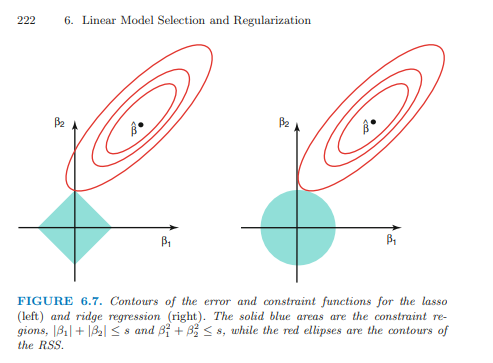

In [12]:
from IPython.display import Image
Image(filename='plot_sgd_penalties.png')